## Boosting算法

提升算法是一种常见的统计学习方法,其作用为将弱的学习算法提升为强学习算法.其理论基础为:强可学习器与弱可学习器是等价的.即在在学习中发现了'弱学习算法',则可以通过某些方法将它特生为强可学习器,这是数学可证明的.在分类学习中提升算法通过反复修改训练数据的权值分布,构建一系列的基本分类器(弱分类器),并将这些基本分类器线性组合,构成一个强学习器.**代表算法为Adaboost算法**,ada是自适应的Adaptive的缩写.

## Adaboost
### 原理
Adaboost的核心思想是通过反复修改数据的权重,从而使一系列弱学习器成为强可学习器.其核心步骤如下:
 - 权值调整,提升被错误分类的样本的权重,降低被正确分类的权重
 - 基分类器组合,采用加权多数表决算法,加大分类误差率较小的弱分类器的权重,减小误差大的.
 
### 特性

 - Adaboost更加专注于偏差,他可以降低基学习器的偏差,对基学习器进行进一步的提升.
 - Adaboost的默认基学习器是决策树,我们也可以过会会使用其他基学习器证明其对降低偏差的影响.
 - Adaboost的训练误差分析表明,Adaboost每次迭代可以减少它在训练数据集上的分类误差率,这说明了它作为提升方法的有效性.但是在实际使用中要注意方差-偏差困境,避免泛化能力的降低.

### sklearn实现

sklearn中的实现一共有两种,SAMME 与 SAMME.R:
 - SAMME使用预测错误的标签进行调整,而SAMME则使用预测类别的概率进行调整.
 - SAMME.R收敛速度快,实现较低的测试错误需要的迭代次数更少
 - SAMME.R必须需要基学习器实现了返回类别的预测概率.SAMME则不需要
 - SAMME.R在较大学习率时对原始数据的拟合能力会出现降低,而SAMME不会
 - 在这两个算法中都存在早停(early_stop)机制,当到达内部的停止条件时,就会自动停止提升,从而出现Adaboost实际上的n_estimators小于,我们自己设置的n_estimators,这样做有利于防止过拟合.
 
 
这些特性我们将会在后面进行相应的实验证明这些特性.

## 进行回归学习器的相关实验,验证理论特性
### Adaboost可以对基学习器进行进一步提升
#### 简介
我们可以将之前在[回归决策树中的例子](http://blog.csdn.net/fontthrone/article/details/78824945)稍加改造,我们依旧利用numpy生成sin正弦函数的数据,然后添加噪音.
这样通过噪音我们就可以更加直观地看到算法的拟合能力(偏差)以及过拟合现象(方差).

在下面的例子中,我们一共定义了了三个估计器,绘制了三张图片.
**其中前两个估计器为决策树,超参数使用了max_depth一个为2,一个为5,后两个为以决策树为基估计器的提升算法,max_depth都为2,但是控制超参数n_estimators不同也就是一个为10(提升了9次),另外一个为500(提升499次).**

#### 代码及绘图如下:
首先使用回归类别的学习器进行实验,在sklearn中的AdaBoostRegressor,并没有SAMME与SAMME.R的区别.

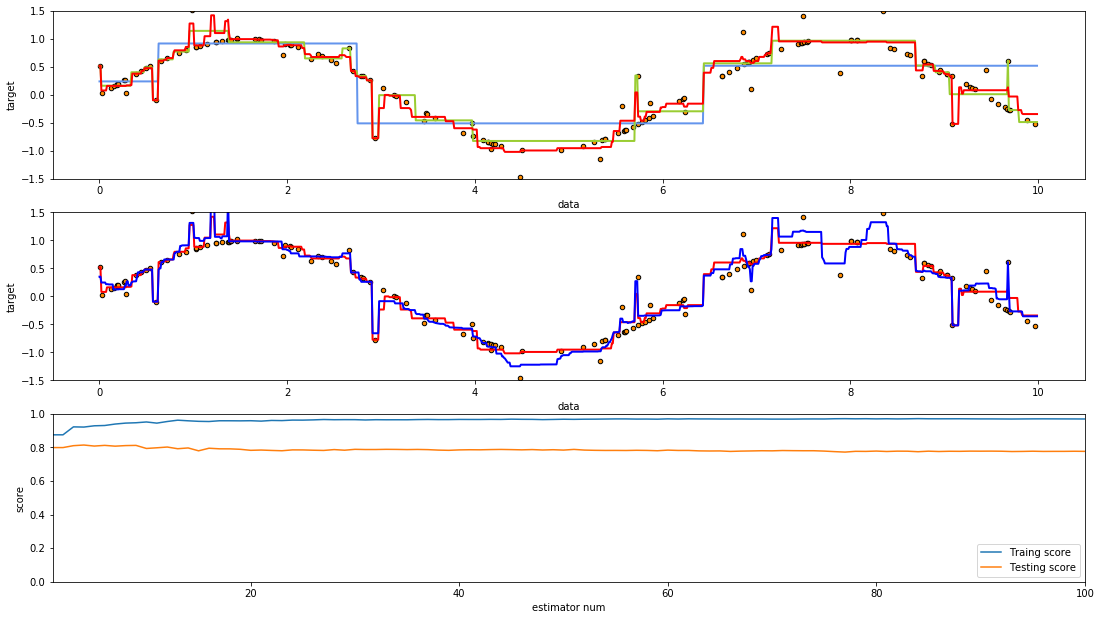

In [3]:
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(10 * rng.rand(160, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 2 * (0.5 - rng.rand(int(len(X)/5))) # 每五个点增加一次噪音

# Fit regression model
               
estimators_num = 500

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),n_estimators=10, random_state=rng)
regr_4 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),n_estimators=estimators_num, random_state=rng)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)
regr_4.fit(X, y)

# Predict
X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
y_test = np.sin(X_test).ravel()
y_test[::5] += 2 * (0.5 - rng.rand(int(len(X_test)/5))) # 每五个点增加一次噪音
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
y_4 = regr_4.predict(X_test)

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(3, 1, 1)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
ax.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
ax.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
ax.plot(X_test, y_3, color="r", label="n_estimators=100", linewidth=2)
ax.set_xlabel("data")
ax.set_ylabel("target")
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-0.5, 10.5)


ax = fig.add_subplot(3, 1, 2)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
ax.plot(X_test, y_3, color="r", label="n_estimators=10", linewidth=2)
ax.plot(X_test, y_4, color="blue", label="n_estimators=500", linewidth=2)
ax.set_xlabel("data")
ax.set_ylabel("target")
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-0.5, 10.5)

regr_4_estimators_num = len(regr_4.estimators_)
ax = fig.add_subplot(3, 1, 3)
ax.plot(list(range(1, regr_4_estimators_num + 1))[:100], list(regr_4.staged_score(X, y))[:100], label="Traing score")
ax.plot(list(range(1, regr_4_estimators_num + 1))[:100], list(regr_4.staged_score(X_test, y_test))[:100], label="Testing score")
ax.set_xlabel("estimator num")
ax.set_ylabel("score")
ax.legend(loc="lower right")
ax.set_ylim(0, 1)
ax.set_xlim(1, 100)
plt.show()

#### 程序及绘图解析
**第一幅图片**中绘制了三张曲线,从图片我们可以明显看出,深度为5决策树的拟合效果要好于深度为2的决策树,而提升算法则大幅度强化了原来决策树的拟合能力.

**第二张图片**中则分别绘制了,n_estimators为10与n_estimators为500的AdaBoost算法(并且基估计器一致).可以看出n_estimators=500的AdaBoost估计器的拟合效果明显要高于n_estimators=10的估计器,但是我们也可以直观的看出后者相较于拟合了更多的噪音.

同时在**第三幅图**绘制的训练,测试曲线则是绘制了n_estimator=500的AdaBoost估计器在整个提升过程中(n_estimators=1到500的过程中)的训练效果,可以看出虽然随着n_estimators的增加确实可以使AdaBoost拥有更强的拟合能力,但是因为过拟合,测试成绩却也随着拟合能力的提高,先(略微)提高,然后降低了.

#### 限制
虽然AdaBoost可以提高基学习器的拟合能力,但这种提升也取决于基学习器本身,AdaBoost算法无法无限制的提升基学习器的拟合能力.以刚刚的代码为例,假如将AdaBoost的基学习器的max_depth替换为2,那么AdaBoost将会很快早停.因此可见,在实际的使用中不仅仅是AdaBoost的超参数本身,基学习器的选择也是十分重要的.

#### 代码以及演示效果:

regr_5的实际提升次数为10
regr_6的实际提升次数为10


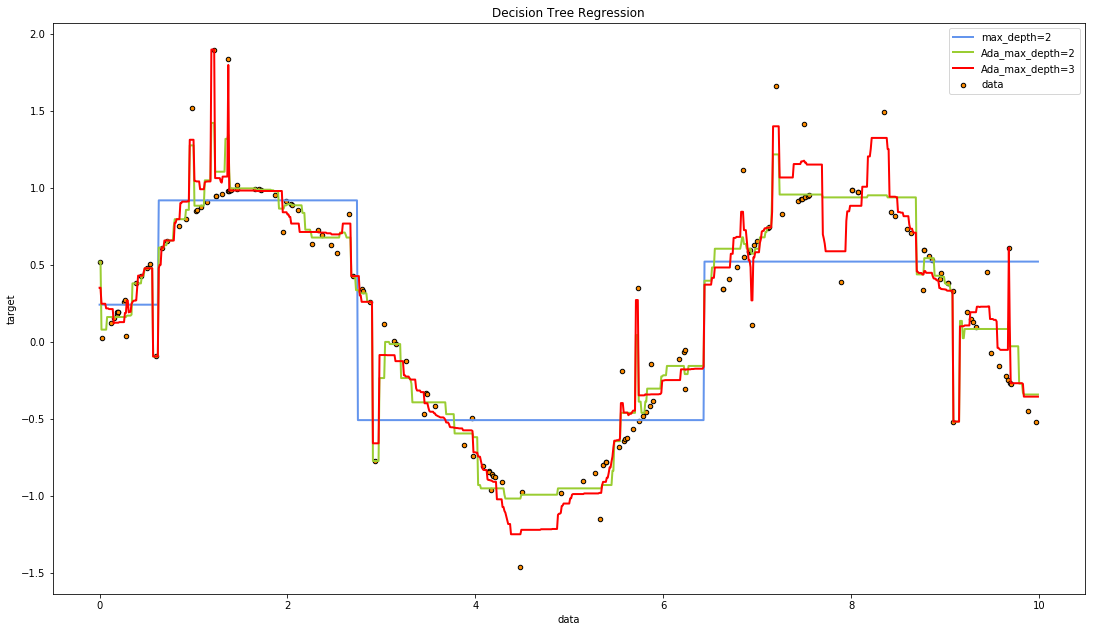

In [14]:
regr_5 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2),n_estimators=estimators_num, random_state=rng)
regr_6 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3),n_estimators=estimators_num, random_state=rng)

regr_5.fit(X, y)
regr_6.fit(X, y)
y_5 = regr_3.predict(X_test)
y_6 = regr_4.predict(X_test)

print('regr_5的实际提升次数为%d'%len(regr_5.estimators_))
print('regr_6的实际提升次数为%d'%len(regr_5.estimators_))
# Plot the results
plt.figure(figsize=(18.5, 10.5))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test, y_5, color="yellowgreen", label="Ada_max_depth=2", linewidth=2)
plt.plot(X_test, y_6, color="r", label="Ada_max_depth=3", linewidth=2)
# plt.plot(X_test, y_4, color="black", label="n_estimators=500", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

**通过绘制出的图形,我们可以看出regr_5(黄绿色)的拟合效果要好于之前所有而学习器,不仅拥有很好的拟合能力,而且过拟合程度很低,在实际的使用过程中,拥有最佳拟合能力与泛化能力的学习器正是我们想要的结果**

`
regr_5 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2),n_estimators=estimators_num, random_state=rng)
`

#### 学习率与损失函数
在AdaBoostRegressor比较重要的另外两个超参数则是学习率与损失函数,学习率一般较小,这个请根据具体的CV进行判断,而损失函数的差距则不大,但是因为其对最终结果也存在着一定的影响,请在正式的实验中重视该超参数.
**下面的代码展示了不同损失函数时的训练-测试误差曲线**:

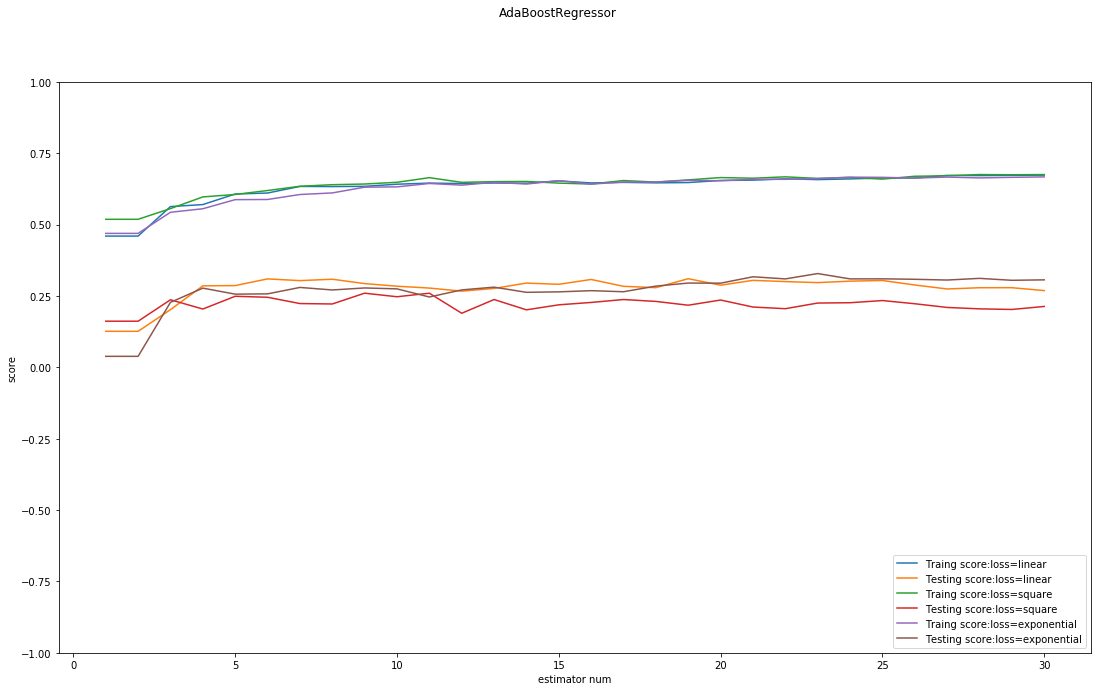

In [15]:
from sklearn import datasets,model_selection
diabetes = datasets.load_diabetes()  # 使用 scikit-learn 自带的一个糖尿病病人的数据集
X_train, X_test, y_train, y_test = model_selection.train_test_split(diabetes.data, diabetes.target,test_size=0.25, random_state=0)
losses = ['linear', 'square', 'exponential']
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(1, 1, 1)
for i, loss in enumerate(losses):
    regr = AdaBoostRegressor(loss=loss, n_estimators=30)
    regr.fit(X_train, y_train)
    ## 绘图
    estimators_num = len(regr.estimators_)
    X = range(1, estimators_num + 1)
    ax.plot(list(X), list(regr.staged_score(X_train, y_train)),
            label="Traing score:loss=%s" % loss)
    ax.plot(list(X), list(regr.staged_score(X_test, y_test)),
            label="Testing score:loss=%s" % loss)
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(-1, 1)
plt.suptitle("AdaBoostRegressor")
plt.show()

## 进行分类决策树的相关实验,证明理论特性

建立四种学习率下SAMME与SAMME.R两种算法的比较.

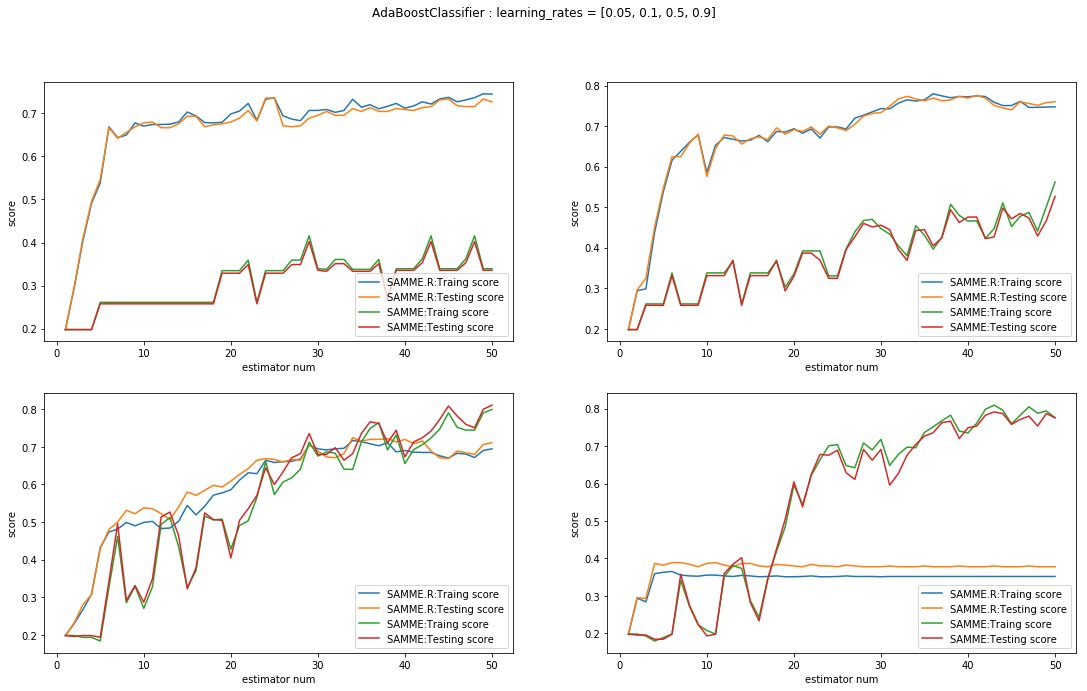

In [16]:
from sklearn.ensemble import AdaBoostClassifier
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data, digits.target,test_size=0.25, random_state=0,stratify=digits.target)
algorithms = ['SAMME.R', 'SAMME']
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
learning_rates = [0.05, 0.1, 0.5, 0.9]
for i, learning_rate in enumerate(learning_rates):
    ax = fig.add_subplot(2, 2, i + 1)
    for i, algorithm in enumerate(algorithms):
        clf = AdaBoostClassifier(learning_rate=learning_rate,
                                          algorithm=algorithm)
        clf.fit(X_train, y_train)
        ## 绘图
        estimators_num = len(clf.estimators_)
        X = range(1, estimators_num + 1)
        ax.plot(list(X), list(clf.staged_score(X_train, y_train)),
                label="%s:Traing score" % algorithms[i])
        ax.plot(list(X), list(clf.staged_score(X_test, y_test)),
                label="%s:Testing score" % algorithms[i])
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
#     ax.set_title("learing rate:%f" % learning_rate)
fig.suptitle("AdaBoostClassifier : learning_rates = [0.05, 0.1, 0.5, 0.9]")
plt.show()

我们首先考虑从学习率的角度进行比较,非常明显的是在这四幅图中随着学习率的增加,SAMME.R算法的成绩出现了大幅度的下降.
而SAMME在更大的学习率下则指表现出了更快的提升速度(当然对于最终结果,学习率较小更好一些).

**同时下面给出一个新的代码,这个代码可以更形象的对比出,学习率对这两种算法的影响:**

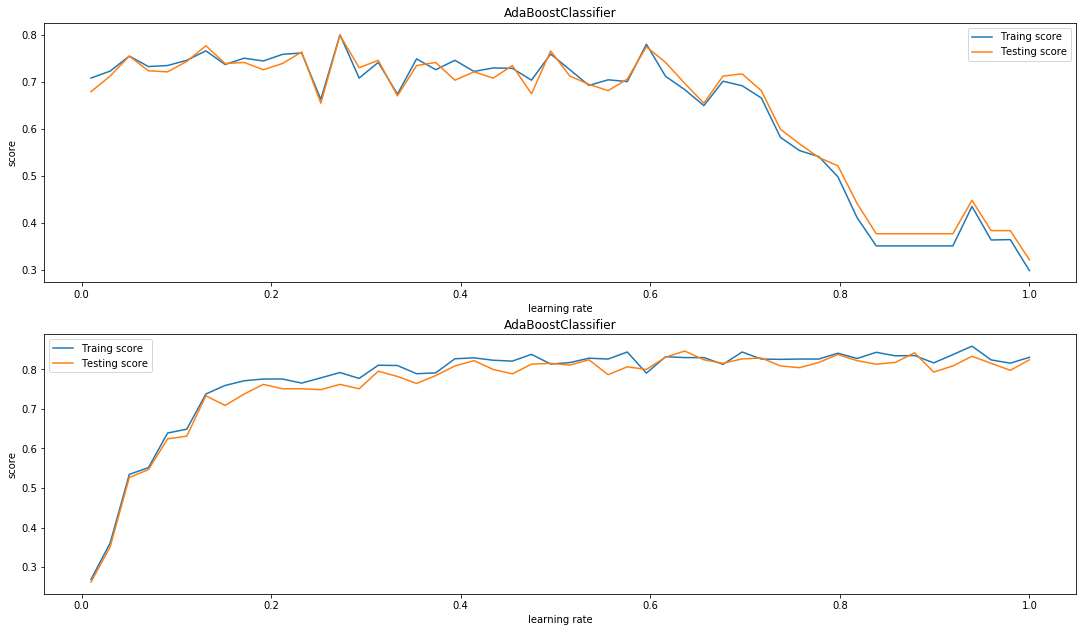

In [28]:
learning_rates = np.linspace(0.01, 1)
fig = plt.figure(figsize=(18.5,10.5))
algorithms = ['SAMME.R', 'SAMME']
for i, algorithm in enumerate(algorithms):
    ax = fig.add_subplot(2, 1, i+1)
    traing_scores = []
    testing_scores = []
    for learning_rate in learning_rates:
        clf = AdaBoostClassifier(learning_rate=learning_rate, n_estimators=100,algorithm=algorithm)
        clf.fit(X_train, y_train)
        traing_scores.append(clf.score(X_train, y_train))
        testing_scores.append(clf.score(X_test, y_test))
    ax.plot(learning_rates, traing_scores, label="Traing score")
    ax.plot(learning_rates, testing_scores, label="Testing score")
    ax.set_xlabel("learning rate")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostClassifier")
plt.show()

**然后我们从两种算法的收敛速度进行比较相比于SAMME,SAMME.R明显拥有更快的收敛速度**,同时获取较低的错误率也只需要更少的训练,[此处可以参考sklearn的官方文档](http://sklearn.apachecn.org/cn/0.19.0/auto_examples/ensemble/plot_adaboost_multiclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-multiclass-py)同时在官网的文档中还给出了另外一个例子,请看下面:

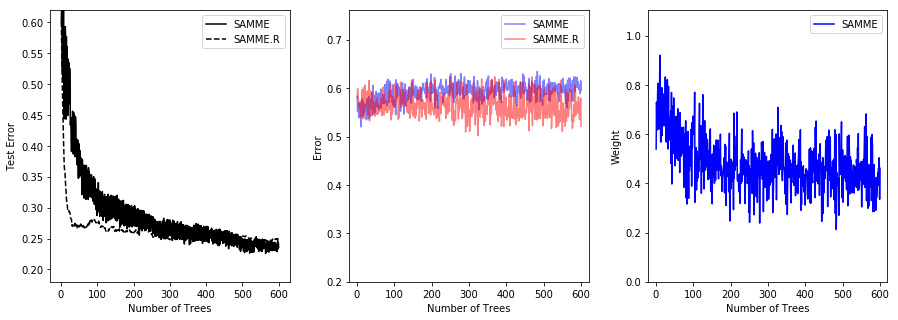

In [19]:
from sklearn.externals.six.moves import zip
from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X, y = make_gaussian_quantiles(n_samples=13000, n_features=10,
                               n_classes=3, random_state=1)

n_split = 3000

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='black',
         linestyle='dashed', label='SAMME.R')
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "b", label='SAMME', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "r", label='SAMME.R', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "b", label='SAMME')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

比较SAMME和SAMME.R [1]算法的性能。SAMME.R使用概率估计来更新可加模型，而SAMME只使用分类。如示例所示，SAMME.R算法通常比SAMME更快地收敛，通过更少的提升迭代实现更低的测试误差。左侧显示每次升压迭代后测试集上每种算法的误差，中间显示每棵树测试集上的分类错误，右侧显示每棵树的升压权重。所有的树在SAMME.R算法中的权重都是1，因此不显示.


同时在里还有另外一个例子很好的展示了,AdaBoost对于不同基学习器的提升的影响.其对于强学习器的提升较少也较慢,但是对弱学习器的提升则更为明显.在下面的例子中,使用的第一个决策树基学习器的是'弱学习器',AdaBoost对其性能的提升速度很快,而第二个学习器'高斯朴素贝叶斯分类器'在该数据集上则表现为'强学习器',因此AdaBoost对其的提升要相对慢得多,代码如下:

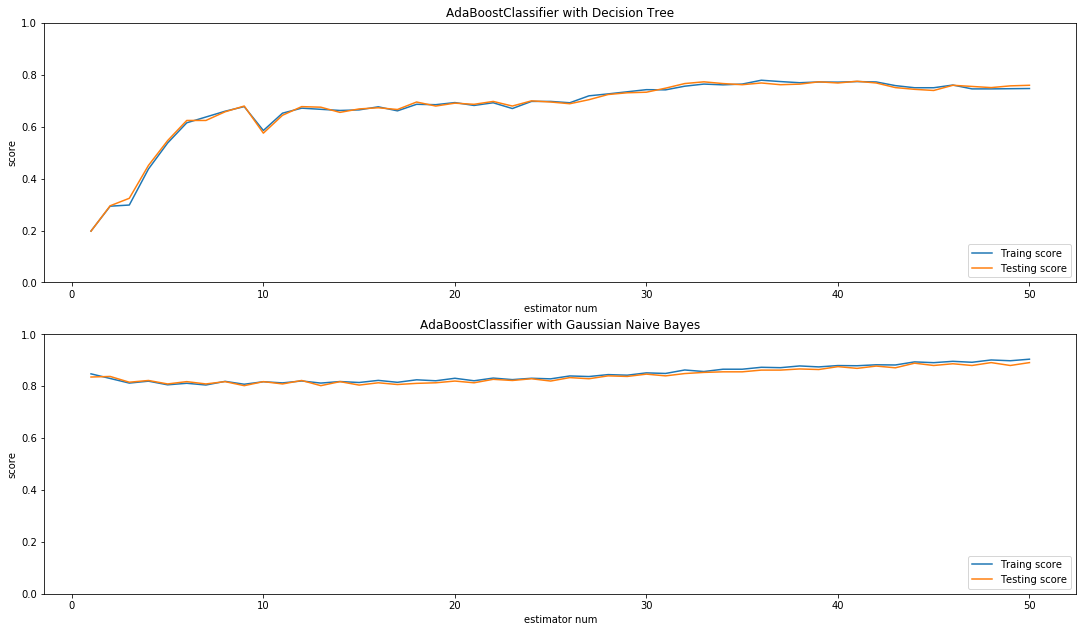

In [29]:
from sklearn.naive_bayes import GaussianNB

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data, digits.target,test_size=0.25, random_state=0,stratify=digits.target)

fig = plt.figure(figsize=(18.5,10.5))
ax = fig.add_subplot(2, 1, 1)
########### 默认的个体分类器 #############
clf = AdaBoostClassifier(learning_rate=0.1)
clf.fit(X_train, y_train)
## 绘图
estimators_num = len(clf.estimators_)
X = range(1, estimators_num + 1)
ax.plot(list(X), list(clf.staged_score(X_train, y_train)), label="Traing score")
ax.plot(list(X), list(clf.staged_score(X_test, y_test)), label="Testing score")
ax.set_xlabel("estimator num")
ax.set_ylabel("score")
ax.legend(loc="lower right")
ax.set_ylim(0, 1)
ax.set_title("AdaBoostClassifier with Decision Tree")
####### Gaussian Naive Bayes 个体分类器 ########
ax = fig.add_subplot(2, 1, 2)
clf = AdaBoostClassifier(learning_rate=0.1, base_estimator=GaussianNB())
clf.fit(X_train, y_train)
## 绘图
estimators_num = len(clf.estimators_)
X = range(1, estimators_num + 1)
ax.plot(list(X), list(clf.staged_score(X_train, y_train)), label="Traing score")
ax.plot(list(X), list(clf.staged_score(X_test, y_test)), label="Testing score")
ax.set_xlabel("estimator num")
ax.set_ylabel("score")
ax.legend(loc="lower right")
ax.set_ylim(0, 1)
ax.set_title("AdaBoostClassifier with Gaussian Naive Bayes")
plt.show()

#### [Discrete versus Real AdaBoost](http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_hastie_10_2.html#sphx-glr-auto-examples-ensemble-plot-adaboost-hastie-10-2-py)
** 下面的例子对AdaBoostClassifier的两种算法及其提升效果进行更详细的描述 **

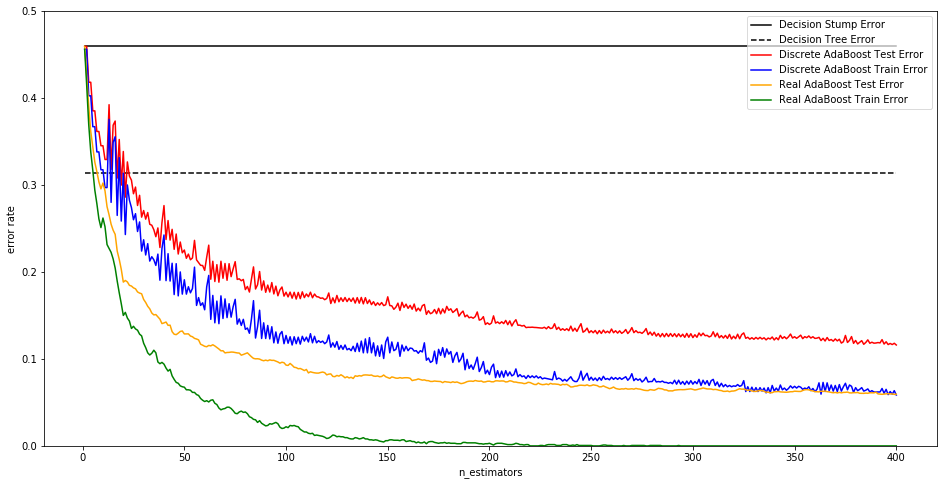

In [30]:
from sklearn.metrics import zero_one_loss

n_estimators = 400
# A learning rate of 1. may not be optimal for both SAMME and SAMME.R
learning_rate = 1.

X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)

X_test, y_test = X[2000:], y[2000:]
X_train, y_train = X[:2000], y[:2000]

dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train, y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, y_test)

dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)
dt.fit(X_train, y_train)
dt_err = 1.0 - dt.score(X_test, y_test)

ada_discrete = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME")
ada_discrete.fit(X_train, y_train)

ada_real = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME.R")
ada_real.fit(X_train, y_train)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [dt_stump_err] * 2, 'k-',
        label='Decision Stump Error')
ax.plot([1, n_estimators], [dt_err] * 2, 'k--',
        label='Decision Tree Error')

ada_discrete_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)

ada_discrete_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, y_train)

ada_real_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

ada_real_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)

ax.plot(np.arange(n_estimators) + 1, ada_discrete_err,
        label='Discrete AdaBoost Test Error',
        color='red')
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err_train,
        label='Discrete AdaBoost Train Error',
        color='blue')
ax.plot(np.arange(n_estimators) + 1, ada_real_err,
        label='Real AdaBoost Test Error',
        color='orange')
ax.plot(np.arange(n_estimators) + 1, ada_real_err_train,
        label='Real AdaBoost Train Error',
        color='green')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

## 参考资料
 - [sklearn官方文档:AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)
 - [sklearn官方文档:Multi-class AdaBoosted Decision Trees](http://sklearn.apachecn.org/cn/0.19.0/auto_examples/ensemble/plot_adaboost_multiclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-multiclass-py)
 - [sklearn官方文档:Discrete versus Real AdaBoost](http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_hastie_10_2.html#sphx-glr-auto-examples-ensemble-plot-adaboost-hastie-10-2-py)
 - [sklearn官方文档:ensemble(集成算法)](http://scikit-learn.org/stable/modules/ensemble.html)
 - 《python大战机器学习 数据科学家的一个小目标》华校专，王正林编著